# Стационарность рядов

Известны ежемесячные продажи австралийского вина в тыс¤чах литров с января 1980 по июль 1995, необходимо построить прогноз на следующие три года.

In [27]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product


Populating the interactive namespace from numpy and matplotlib


C:\Users\Alsu1\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
wine = pd.read_csv('D:\GITHUB\DA_NEW\Datasets\monthly-australian-wine-sales.csv',',', index_col=['month'], parse_dates=['month'], dayfirst=True)


In [29]:
wine.head(10)

,sales
month,
1980-01-01,15136
1980-02-01,16733
1980-03-01,20016
1980-04-01,17708
1980-05-01,18019
1980-06-01,19227
1980-07-01,22893
1980-08-01,23739
1980-09-01,21133


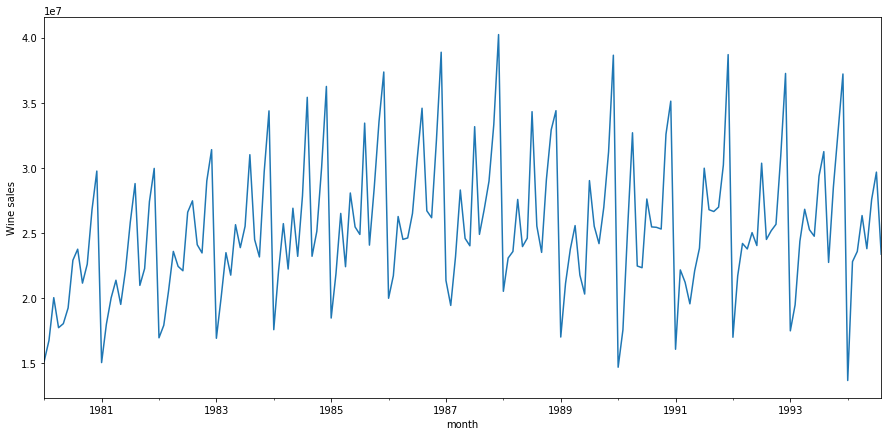

In [30]:
wine.sales = wine.sales * 1000
plt.figure(figsize(15,7))
wine.sales.plot()
plt.ylabel('Wine sales')
pylab.show()

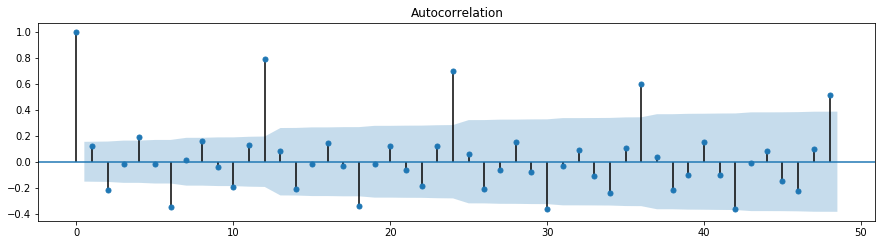

In [31]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(wine.sales[13:].values.squeeze(), lags=48, ax=ax)
pylab.show()


К основным видам моделей временных рядов относятся модели, предполагающие зависимость  одного  ряда  от  других  рядов,  модели  представляющие  зависимость текущих  значений  ряда  от  его  же  прошлых  значений,  а  также  модели,  являющиеся декомпозицией   исходного   ряда   на   несколько   составляющих,   а   именно   тренд, периодическую  и  случайную  составляющие.  В  отдельных  случаях  предполагается также наличие циклической составляющей ряда. 


Ширина  доверительной  полосы для  прогнозных  значений,  и,  оказывается,  что  эта  ширина  существенно  зависит  от свойств моделируемого ряда.
В  связи  с  этим,  а  также  из-за  некоторых  сложностей  моделирования,вводится понятие  стационарного  ряда. Для  решения  практических  задач  обычно  используется понятие стационарности временного ряда.

Под стационарностью понимают свойство процесса не менять своих статистических характеристик с течением времени, а именно постоянство матожидания, постоянство дисперсии (она же гомоскедастичность) и независимость ковариационной функции от времени (должна зависеть только от расстояния между наблюдениями). 


При построении эконометрических моделей на основе временных рядов принято различать в зависимости от наличия основной тенденции стационарные и  нестационарные  временные  ряды. 


 Построение  эконометрической  модели  по временным  рядам,  относящимся  к  разным  типам  стационарности,  может привести к получению неадекватной модели.

Использование  в  регрессионной  модели  нестационарных  временных рядов  может  привести  к  фиктивным  результатам  или  к  построению  так называемой  «мнимой»  или  ложной  регрессии  (spuriousregression).  Это обуславливает  необходимость  учитывать  при  моделировании,  являются  ли временные ряды стационарными или нет
 


Что такое стационарный временной ряд?
Временной ряд называется стационарным, если он удовлетворяет следующим условиям.

1.	Среднее значение временного ряда является постоянным во времени, что означает, что компонент тренда обнуляется.
2.	Дисперсия не увеличивается со временем.
3.	Эффект сезонности минимален.

Это означает, что он лишен трендовых или сезонных паттернов, что делает его похожим на случайный белый шум независимо от наблюдаемого временного интервала. То есть свойства ряда не зависят от времени


Почему стационарность так важна? По стационарному ряду просто строить прогноз, так как мы полагаем, что его будущие статистические характеристики не будут отличаться от наблюдаемых текущих. Большинство моделей временных рядов так или иначе моделируют и предсказывают эти характеристики (например, матожидание или дисперсию), поэтому в случае нестационарности исходного ряда предсказания окажутся неверными.


!!! Таким образом ряды с трендом или сезонностью нестационарны.Ряды с непериодическими циклами стационарны, поскольку нельзяпредсказать заранее, где будут находится максимумы и минимумы.


Для диагностики ряда и оценки возможного класса моделей могут использоваться график ряда, кореллограмма, ряд тестов.
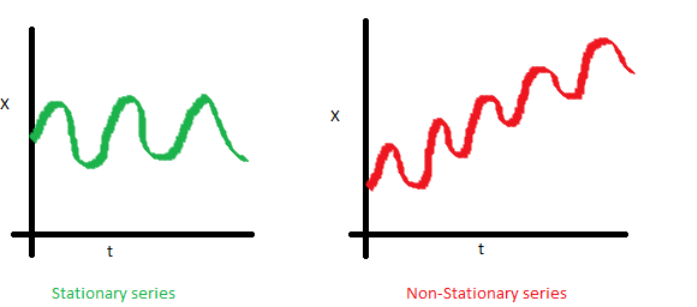
Временной ряд справа не является стационарным, так как его матожидание со временем растёт



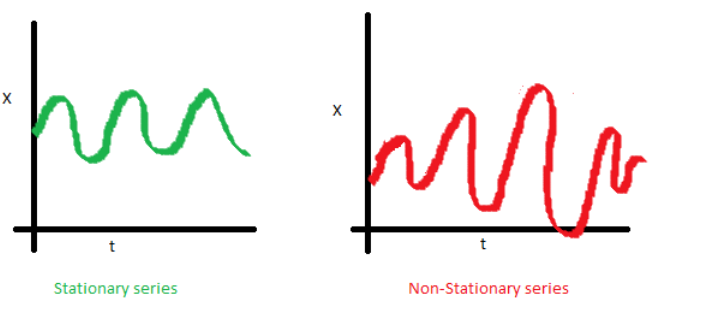
Здесь не повезло с дисперсией — разброс значений ряда существенно варьируется в зависимости от периода

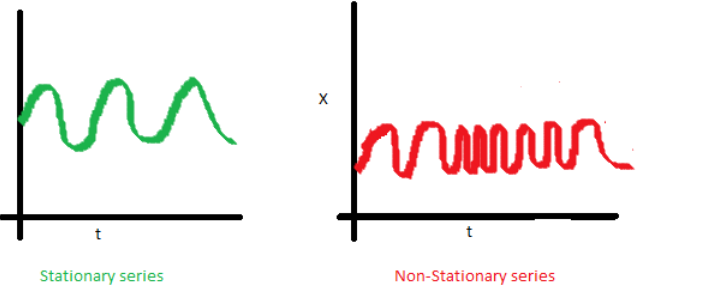

Значения ряда внезапно становятся ближе друг ко другу, образуя некоторый кластер, а в результате получаем непостоянство ковариаций

На Рисунке ниже приведены  графики временных  рядов.  Графически  обычно  легко заметить  непостоянство  математического  ожидания,  которое  может  выражаться  в  наличии тренда, имеющейся периодичности, а также вневозможности поделить ряд на несколько  частей,  каждая  из  которых  будет  иметь  схожее  среднее.Таким  образом можно уверенно говорить о нестационарности рядов на графиках a), d), e).На графике с)  можно  увидеть  непостоянство  дисперсии,  аопределить  на  взгляд  стационарность остальных рядов не получается.Кроме   тогов   исследованиях   часто   встречаются   ряды   асимптотически стационарные,   т.е.   обладающие   всеми   свойствами   стационарности,   начиная   с определенного  момента  времени.Или  стационарные  на  определенном  интервале исследования,  как  это  можно  предположить  на  первых  100  наблюдениях  ряда  a). Поэтому графический анализ является начальной диагностикой ряда.

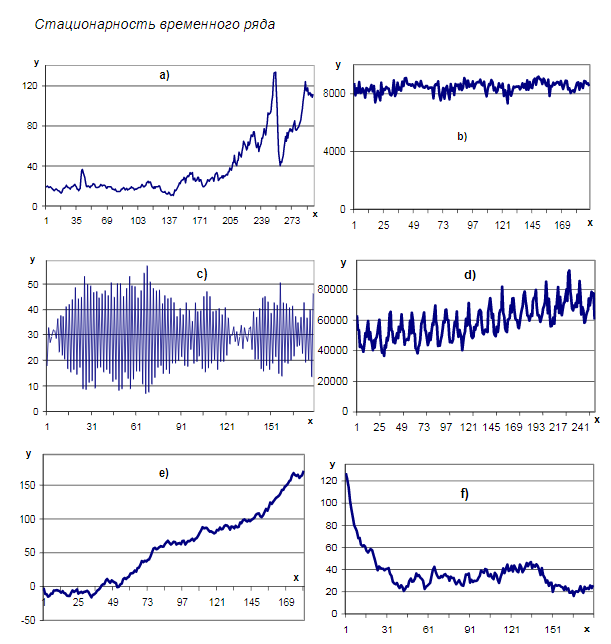

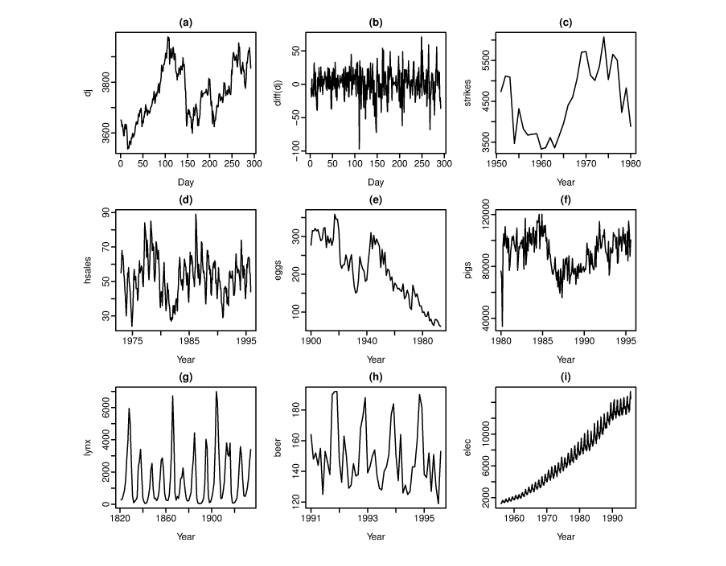

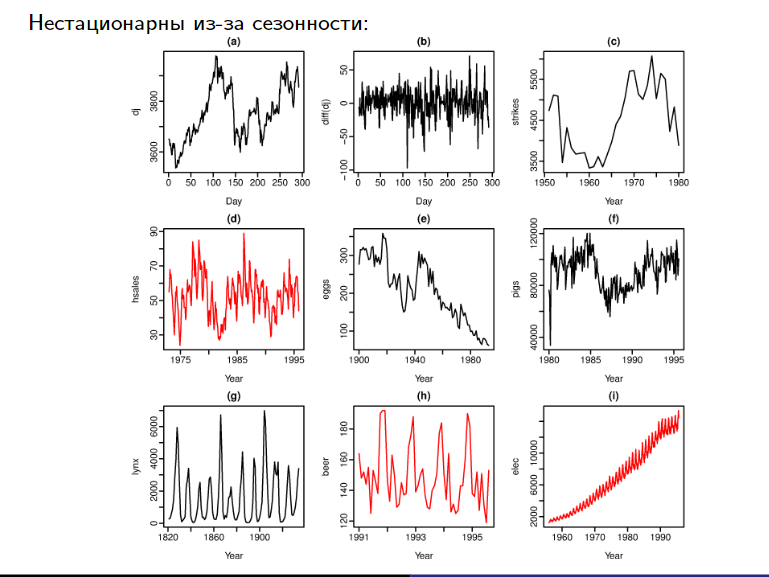

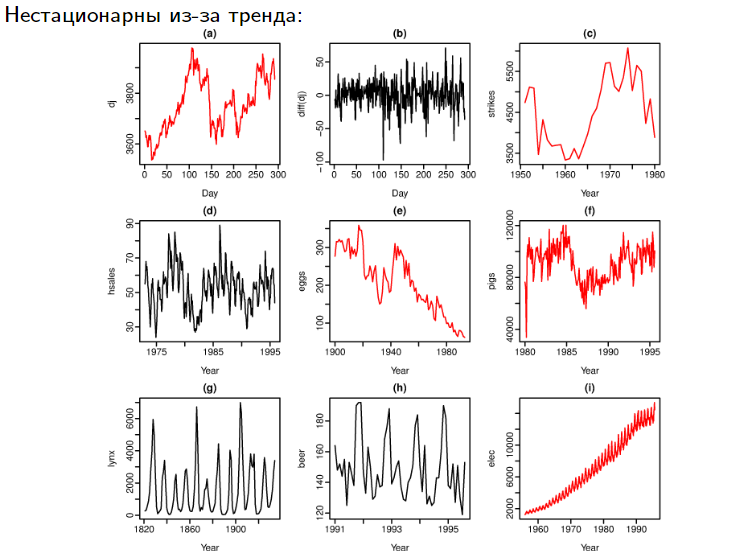

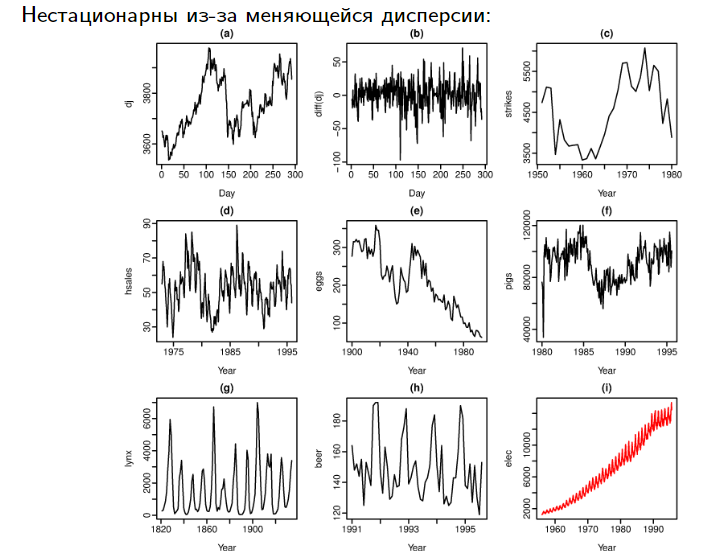

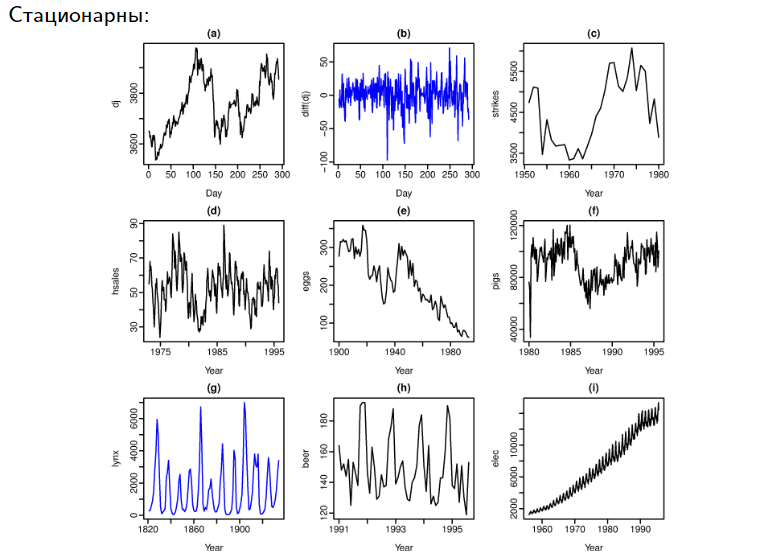

Другим    возможным    способом    оценки    стационарности    ряда    является коррелограмма, т.е. графическое представление автокорреляционной функции (АКФ)

В  случае  стационарного  ряда теоретическая АКФ  сходится  к  0. Поскольку исследователь имеет дело с выборочными автокорреляционными функциями, то сделать вывод по коррелограмме несколько сложнее.Сложности выводов по коррелограмме связаны со случаями коротких временных рядов,  где  как  на  представленном  нижн графике,  наблюдается  быстрое  убывание АКФ,  а  сделать  уверенный  вывод  о  стационарности  исходноговременного  ряда невозможно.  Также  неоднозначна  ситуация,  даже  для  длинного  ряда,  с  медленно сходящейся АКФ, поскольку это может свидетельствовать как о нестационарности, так и   о   стационарном   авторегрессионном   процессе   с   близкими   к   1   значениями коэффициента авторегрессии.



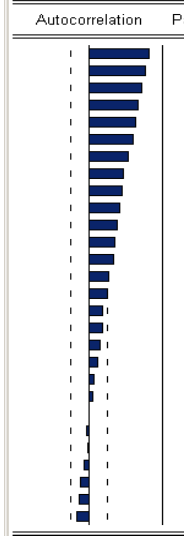

Стационарность  временного  ряда  можно  проверять  напрямую,  исходя  из  ее определения. Для этого ряд нужно разделить на несколько частей и проверить гипотезы о  равенстве  дисперсий  и  математических  ожиданий  этих  частей.
При  положительном результате  проверки  соответствующих  гипотез,  возможна  дополнительная  проверка равенства  АКФ  (попарное  сравнение  коэффициентов  корреляции  каждого  порядка  с помощью теста на равенство корреляции).

Стационарность  временного  ряда  можно  проверять  с  помощью  критериев Дики-Фуллера. Wayne Arthur Fuller родился  в 1931году.  Американский  статистик.  Его ученик David Alan Dicke yродился в 1945 году. Тоже американский статистик.

Эти критерии называют тестом на наличие единичного   корня.   Суть   их   заключается   в следующем:делается  предположение  о  виде  процесса, породившего  данный  временной  ряд;  строится вспомогательная модель и проверяются гипотезы    о    коэффициентах    этой    модели; делается вывод о стационарности/ нестационарности исходного ряда.


Сложность  заключается  


а)  в  корректности предположения о виде вспомогательной модели;

б) в небольшой мощности теста для временных рядов с менее чем 100 наблюдениями.
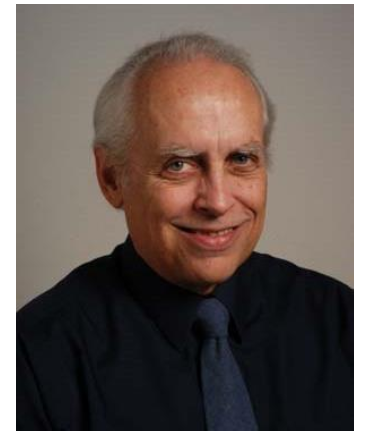

### Стабилизация дисперсии

Что  же  делать,  если  исходный  временной  ряд  был  нестационарным?  Исходный ряд преобразуют, так чтобы он стал стационарным (если это возможно). 
В случае, если во временном ряде монотонно по времени изменяется дисперсия, применя-ется специальное преобразование, стабилизирующее дисперсию - логарифмирование(принадлежит к семейству преобразований Бокса-Кокса)
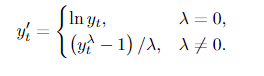

Это параметрическое семейство функций, в котором параметр λ определяет, как именно будет преобразован ряд: λ= 0— это логарифмирование, λ= 1— тождественное преобразование ряда, а при других значениях λ— степенное преобразование. Значение параметра можно подбирать так, чтобы дисперсия была как можно более стабильной во времени

Пример стабилизациию. 

Преобразованный временной ряд по данным о производстве электричества в Австралии. 



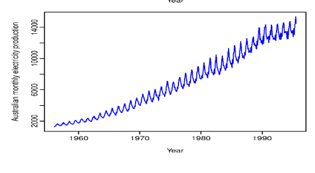


Слева —результат логарифмирования, справа — преобразование Бокса-Кокса с параметромλ= 0.27

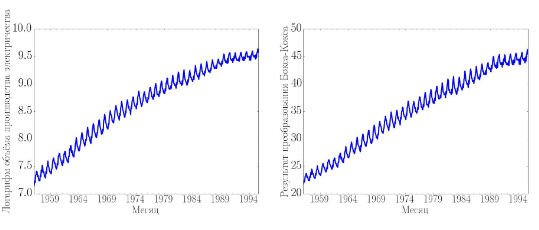

Как правило, стабилизирующее преобразование слабо влияетна прогноз и сильно  на предсказательный интервал.Рябенко ЕвгенийПСАД-9. Анализ временных рядов-1.


Делаем преобразование Кокса- бокса для стабилизации дисперсии ряда Wines:



Параметр $\lambda$ определяется автоматически.

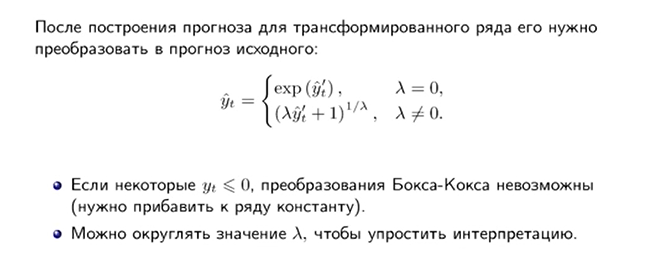

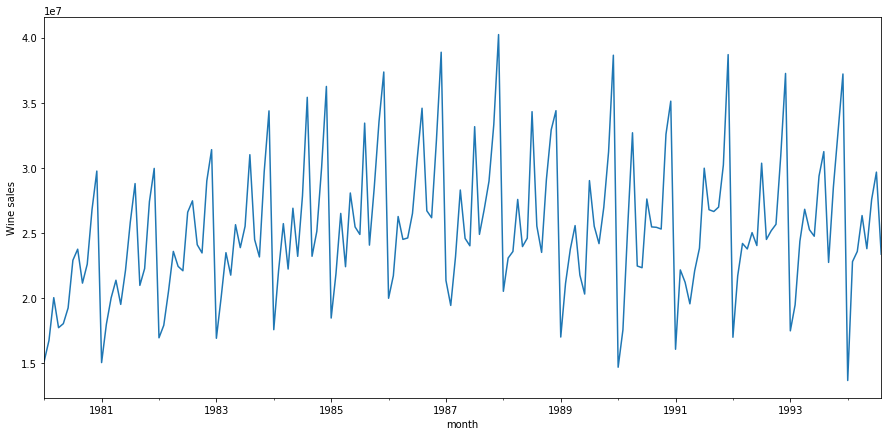

In [32]:
wine = pd.read_csv('D:\GITHUB\DA_NEW\Datasets\monthly-australian-wine-sales.csv',',', index_col=['month'], parse_dates=['month'], dayfirst=True)
wine.sales = wine.sales * 1000
plt.figure(figsize(15,7))
wine.sales.plot()
plt.ylabel('Wine sales')
pylab.show()

Оптимальный параметр преобразования Кокса- Бокса: 0.236675
 Критерий Дики-Фуллера: p=0.029565


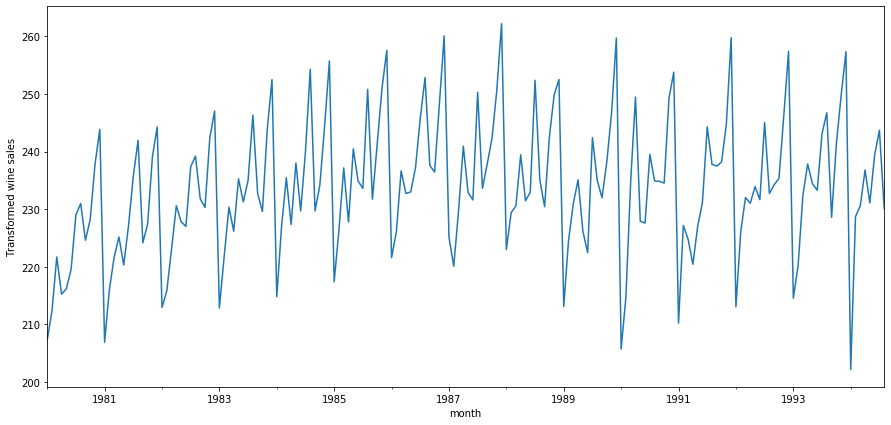

In [33]:
wine['sales_box'], lmbda = stats.boxcox(wine.sales)
plt.figure(figsize(15,7))
wine.sales_box.plot()
plt.ylabel(u'Transformed wine sales')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(wine.sales_box)[1])

### —Стационарность

 Критерий Дики-Фуллера отвергает гипотезу нестационарности, но визуально в данных виден тренд. Попробуем сезонное дифференцирование; сделаем на продифференцированном ряде STL-декомпозицию и проверим стационарность.
 

Дифференцирование


Ещё один важный трюк, который позволяет сделать ряд стационарным, — это дифференцирование, пере-ход к попарным разностям соседних значений:
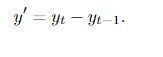


Для нестационарного ряда часто оказывается, что получаемый после дифференцирования ряд является стационарным. Такая операция позволяет стабилизировать среднее значение ряда и избавиться от тренда, аиногда даже от сезонности. Кроме того, дифференцирование можно применять неоднократно: от ряда первыхразностей, продифференцировав его, можно прийти к ряду вторых разностей, и т. д. Длина ряда при этомкаждый раз будет немного сокращаться, но при этом он будет стационарным

Также может применяться сезонное дифференцирование ряда, переход к попарным разностям значенийв соседних сезонах. Если длина периода сезона составляетs, то новый ряд задаётся разностями

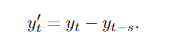

Сезонное и обычное дифференцирование могут применяться к ряду в любом порядке. Однако если у ряда есть ярко выраженный сезонный профиль, то рекомендуется начинать с сезонного дифференцирования, уж епосле такого преобразования может оказаться, что ряд стационарен.

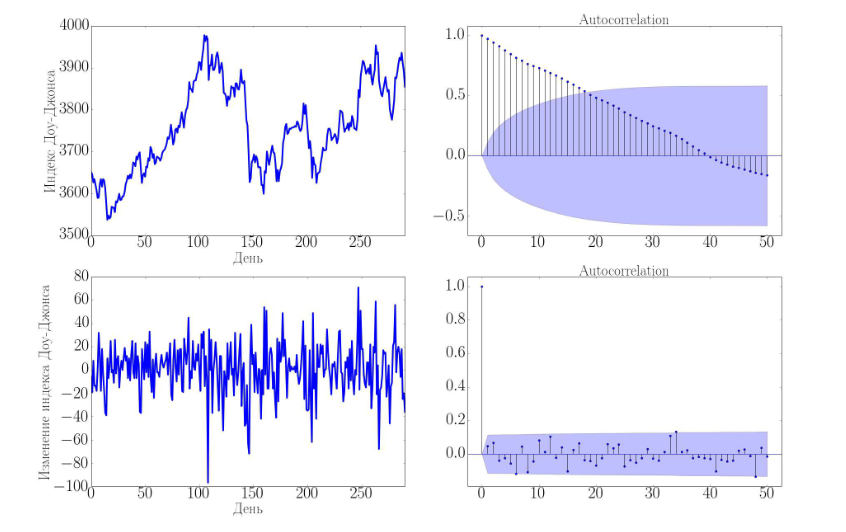

На верхних графиках на рисунке  показаны ряд значений индекса Доу-Джонса и его автокорреляционная функция. 

Видно, что этот ряд достаточно сильно нестационарен — имеется ярко выраженный тренд.От этого тренда удаётся полностью избавиться, продифференцировав ряд. Снизу на рисунке показан ряд после дифференцирования (это ежедневное изменение индекса, и этот ряд уже встречался ранее).



 ритерий Дики-Фуллера: p=0.128317


<Figure size 1080x720 with 0 Axes>

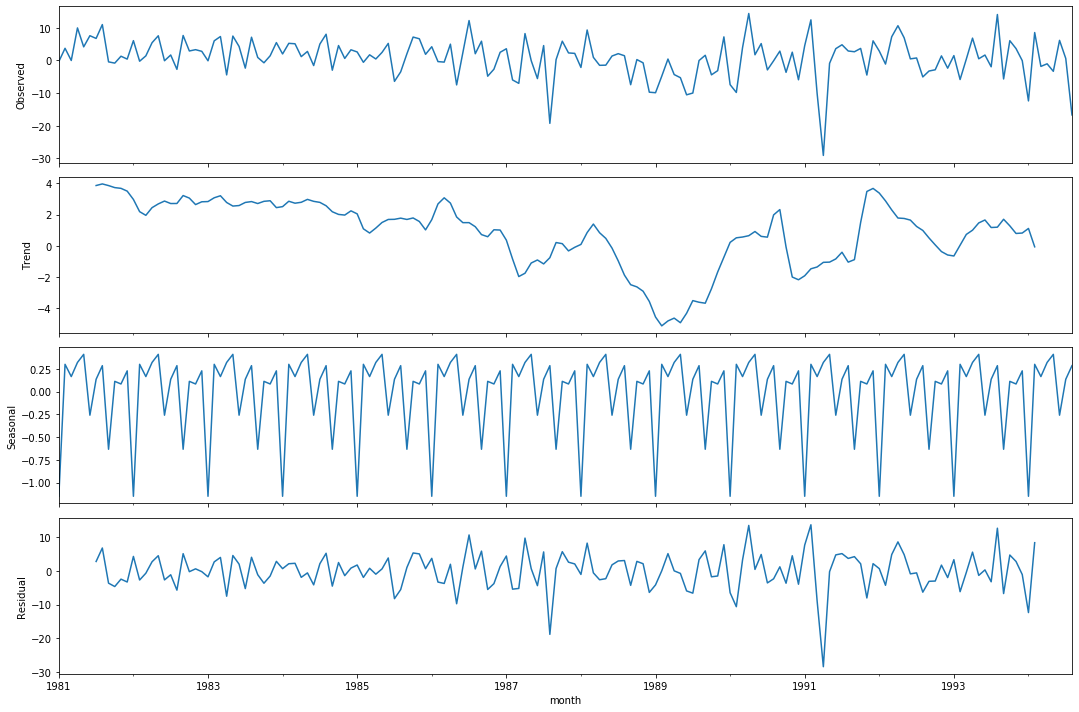

In [34]:
wine['sales_box_diff'] = wine.sales_box - wine.sales_box.shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(wine.sales_box_diff[12:]).plot()
print(" ритерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(wine.sales_box_diff[12:])[1])

 Критерий Дики-Фуллера не отвергает гипотезу нестационарности, и полностью избавиться от тренда не удалось. Попробуем добавить еще обычное дифференцирование:

 Критерий Дики-Фуллера: p=0.000002


<Figure size 1080x720 with 0 Axes>

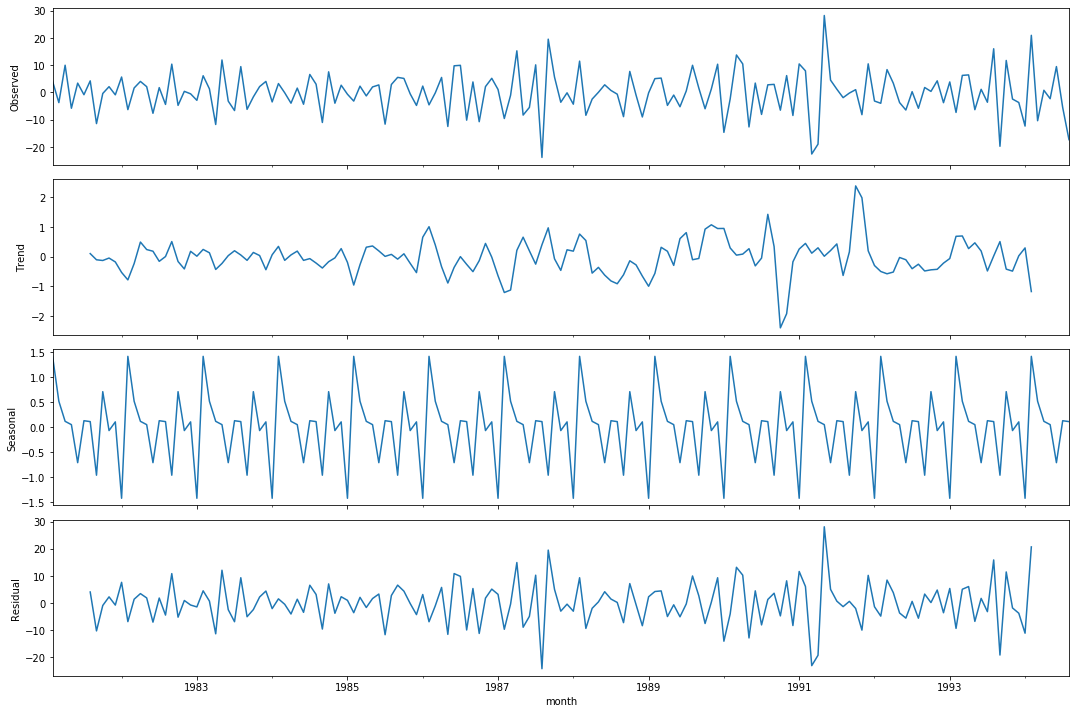

In [35]:
wine['sales_box_diff2'] = wine.sales_box_diff - wine.sales_box_diff.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(wine.sales_box_diff2[13:]).plot()   
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(wine.sales_box_diff2[13:])[1])

Гипотеза нестационарности отвергается, и визуально ряд выглядит лучше тренда больше нет. 

## Автокорреляция ACF И PACF

Посмотрим на ACF и PACF полученного ряда:
как считается выборочная автокорреляция (ACF)

$$r_\tau = \frac{\sum_{t=1}^{T-\tau} (y_t - \bar{y}) (y_{t+\tau} - \bar{y})}{\sum_{t=1}^{T} (y_t - \bar{y})^2}$$
PACF выполняет корректировку на возможную корреляцию между лагами меньшего порядка. <br> Если есть корреляция между $y_{t}$ и $y_{t-1}$ (а соответственно между $y_{t-1}$ и $y_{t-2}$) то корреляция между $y_{t}$ и $y_{t-2}$ тоже будет высока

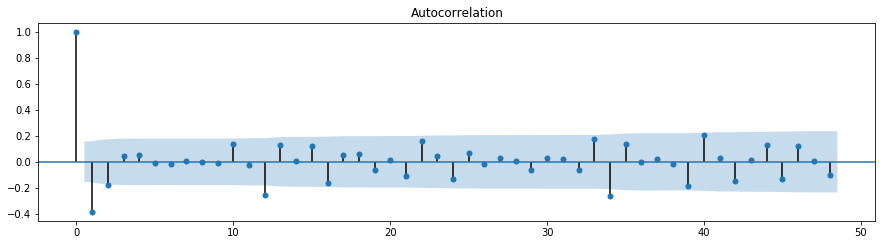

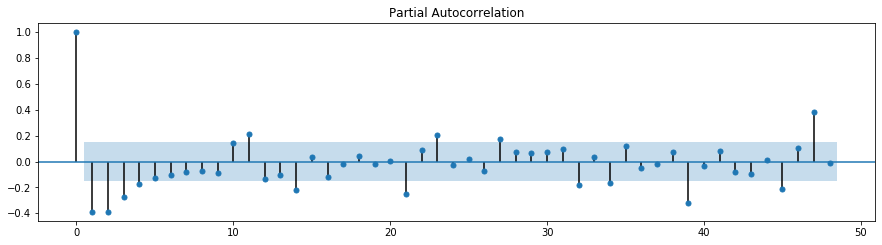

In [38]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(wine.sales_box_diff2[13:].values.squeeze(), lags=4*12, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(wine.sales_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
pylab.show()

Частичная (частная) автокорреляция (partial autocorrelation) временных рядов используется для нахождения периодичностей во временных рядах и нахождения порядка авторегрессионной модели ряда.

https://www.coursera.org/lecture/ekonometrika/8-1-4-chastnaia-avtokorrieliatsionnaia-funktsiia-doska-cjMai


ВЫВОД


К сожалению ни один из методов тестирования стационарности временного ряда не является однозначным и самодостаточным.Разумной   представляется   следующая   последовательность   действий:   изучить график  ряда.  Если  он  выглядит  стационарным, проверить  коррелограмму.  Если  она тоже  соответствует  стационарному  виду,  но  еще  не  белому  шуму,  воспользоваться тестом  Дики-Фуллера  в  модификации None,  с  необходимым  количеством  лагов  для разностей.  При  отвержении  гипотезы  о  единичном  корне,  ряд  можно  моделировать подходящей ARMA моделью.Модель можно считать построенной только тогда, когда ряд остатков представляет из себя белый шум.

При   обнаружении   нестационарности   исходного   временного   ряда   следует определить является ли ряд трендово стационарным, стационарным в разностях или его нельзя свести к стационарному. 


Это можно сделать 


а) зрительно; 

б) с помощью теории и здравого смысла; 

в) с помощью тестов, например Дики-Фуллера, включающих тренд; 

г)  беря  разности  и  рассматривая  коррелограмму  ...  

К  сожалению  однозначного  и лучшего алгоритмов не существует. Выделить    тренд    можно,    построив    линейную    или    нелинейную    модель относительно  моментов  времени t.т.е.  обычную  регрессионную  модель  с  одной независимой  переменной –время.  

Выделить  детерминированную  периодическую составляющую  можно  как  с  помощью  периодических  функций,  так  и  используя фиктивные переменные. Далее необходимо исследовать ряд остатков. 
Если он окажется нестационарным, то возможно 


а) предположение о наличии детерминированного тренда ошибочно, на самом деле он стохастический; 

б) форма тренда определена неверно; 

в) в ряде присутствует как детерминированный, так и стохастический тренды.

Если  вид  тренда  был  определен  корректно,  то  нужно  попробовать  перестроить модель  с  помощью  взятия  разностей.  Обычно  бывает  достаточно  взять  одну  или  две разности,  однако  заранее  сделать  вывод  о  порядке  интегрирования  (так  называется процесс взятия разностей) невозможно.


# Остатки. Необходимые  свойства остатков прогноза

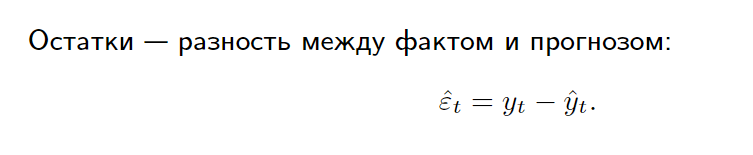

Свойства остатков:
    
1) Несмещённость - равенство среднего значения нулю

2) Стационарность - отсутствие зависимости от времени

3) Неавтокоррелированность - отсутствие неучтённой зависимости от предыдущих наблюдений




Желательные  свойства остатков прогноза:

    1) нормальность
    
    2) Гомоскедастичность - однородность дисперсии
    

Проверка остатков:


1) Несмещённость - критерий Стьюдента или Уилкоксона.

2) Стационарность - визуальный анализ, критерии.

3) Неавтокоррелированность - коррелограмма, Q-критерий Льюнга-Бокса.

4) Нормальность - q-q plot, критерий Шапиро-Уилка.

5) Гомоскедастичность -  визуальный анализ, критерий Бройша-Пагана(при регрессии квадратов остатков на время).

DZ:

1) Прослушать 

об stl Разложениии https://www.coursera.org/lecture/trendy-klassifikatsii/1-4-stl-razlozhieniie-Eg5MQ
автокорреляция https://www.coursera.org/lecture/ekonometrika/8-1-3-avtokorrieliatsionnaia-funktsiia-doska-xKMqU
https://www.coursera.org/lecture/ekonometrika/8-1-4-chastnaia-avtokorrieliatsionnaia-funktsiia-doska-cjMai


 2)Разобрать пример

https://habr.com/ru/company/ods/blog/327242/

3) Прочитайте базу my_PJME_MW.csv(в1), DUQ_hourly.csv(в2), нефть-brent 2010-2019(в3), bikes(в4)  , сделайте описание особенностей этой выборки, сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам или др., проверьте на стационарность. Сделайте вывод о том, как изменилось поведение ряда на недельных и месячных графиках по сравнению с дневными или наоборот, какие ряды наиболее информативные?